In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from intro_Data_4_1 import *

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split as tts

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.datasets import make_moons, make_blobs as mb, load_breast_cancer as lbc, load_iris as li

# $K$-nearest neighbors (KNN)

Our topic in this module is on **classification** techniques.  Classification, like all of the methods we've seen so far, refers to types of **supervised learning**.  With supervised learning, the model is being provided with information about what the correct answers are during the model training process.  In the case of classification, the targets we are trying to predict are labels (or classifications), rather than a continuous range of outputs as in regression.  These labels will often be nominal, or ordinal variables (in the case of an ordinal target, a regression approach might also be suitable).

The first technique we'll discuss is called $k$-nearest neighbors, which simply classifies points according to the classifications of their nearest neighbors ($k$ is a hyperparameter)

## 1. Basic KNN example

We'll first try KNN using data generated with the make_blobs function from sklearn:

In [38]:
# Create (isotropic Gaussian) blobs using the make_blobs function from sklearn

# How many blobs, total points, and dimensions (features)
n_groups = 3
n_points = 100
n_feats = 2

np.random.seed(146)

data = mb(n_samples = n_points, n_features=n_feats, centers = n_groups)
X = data[0]
y = data[1]

#print(np.shape(X))
#print(X)

#print(np.unique(y))

print(np.shape(X))
y

(100, 2)


array([2, 1, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1,
       0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0,
       1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0])

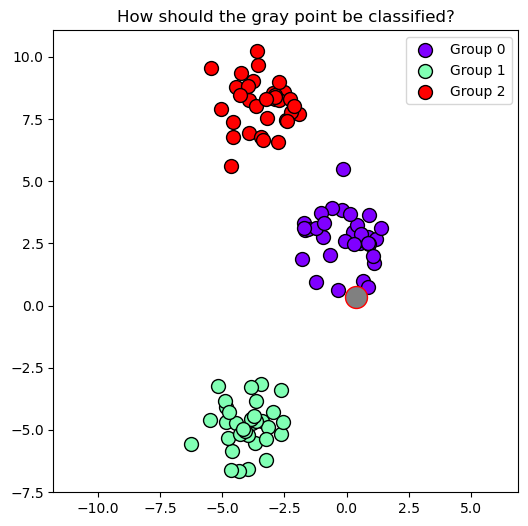

In [39]:
# Make a scatterplot of this data, color each group separately


# get the list of colors
colors = get_colors(n_groups)

#print(colors)


plt.figure(figsize = [6,6])

for yi in np.unique(y):
    # Plot the rows of data with the current value of yi
    idx = (y==yi)
    plt.scatter(X[idx,0], X[idx,1],color=colors[yi][0:5], ec='k',s=100, label = 'Group ' + str(yi))



# Create a new data point
random_point = np.random.random(size=n_feats)

#random_point[0] = 50


# Add this point to the plot
plt.scatter(random_point[0], random_point[1], color='grey', s=250, ec='r')

plt.legend()
plt.title('How should the gray point be classified?')
plt.axis('equal')
plt.show()




In [40]:
# KNN fit (what does this really do?)
knn = KNN(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [41]:
# KNN predict label
knn.predict(random_point.reshape(1,-1))


array([0])

In [42]:
# predict probability of being each class
knn.predict_proba(random_point.reshape(1,-1))

array([[1., 0., 0.]])

In [43]:
# get neighbors; 
#first array: lengths to target point; second array: indices of target point
knn.kneighbors([random_point])

(array([[0.60837488, 0.68834077, 0.78450033, 1.52789423, 1.71988257]]),
 array([[91, 80, 51, 28, 96]]))

In [44]:
# get only indices of k-neighbors
neighbors = knn.kneighbors([random_point], return_distance = False)
neighbors

array([[91, 80, 51, 28, 96]])

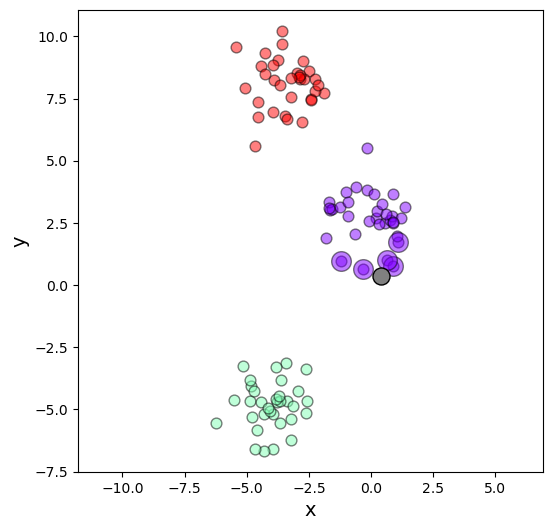

In [45]:
# Make a scatterplot of the train/test data with colors, and highlight the neighbors of the test data 

# scatterplot of the train data with colors
fig, ax = plot_groups(X,y,colors,s = 60)
# plot neighbors of the test data with larger sizes
plot_groups(X[neighbors],y[neighbors],colors, s = 200, ax = ax)
# add the test data
ax.scatter(random_point[0], random_point[1], color='grey', s=150, ec='k')

plt.axis('equal')
plt.show()

## 2. Finding the optimal K

Example using the breast cancer data

In [46]:
# Load data, split into features/target

data = lbc()
X = data.data
X_names = data.feature_names
y = data.target
y_names = data.target_names

In [47]:
X.shape

(569, 30)

In [48]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

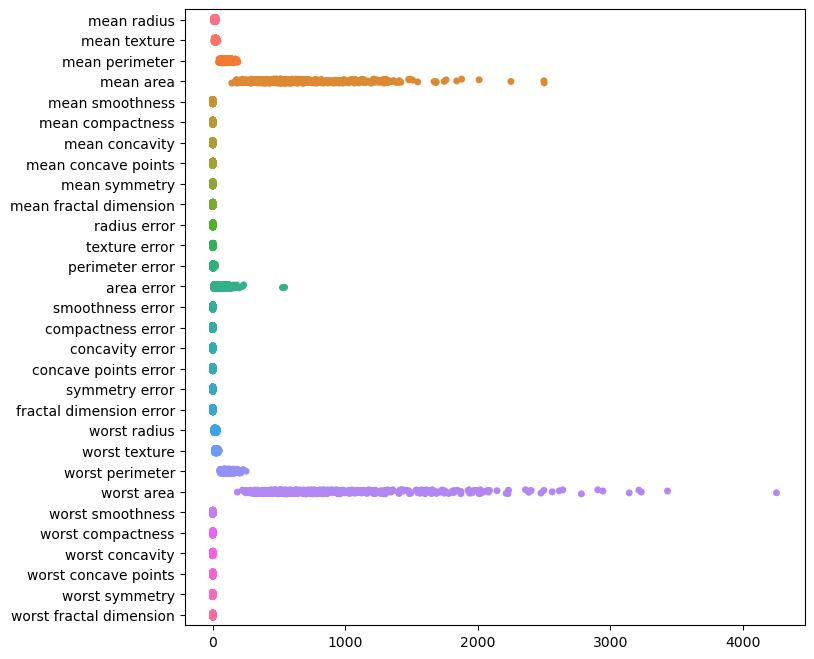

In [49]:
# Make a stripplot (why do we do this?)

import seaborn as sns
plt.figure(figsize = [8,8])
sns.stripplot(data = pd.DataFrame(X,columns = X_names), orient = 'h')
plt.show()

In [50]:
# Find the optimal K

# range of K
neighbor_range = np.array(range(2,20))

print(neighbor_range)


train=[]
test=[]

# what is this?
k = 10

# Get train/test scores using K-fold cross validation 
# Looks familiar?
# What really is the score?
for n_neighbors in neighbor_range:
    knn = KNN(n_neighbors=n_neighbors)
    # be sure to put SS (why?)
    tr,te = do_Kfold(knn,X,y,k, SS())
    
    train.append(np.mean(tr))
    test.append(np.mean(te))
    


[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


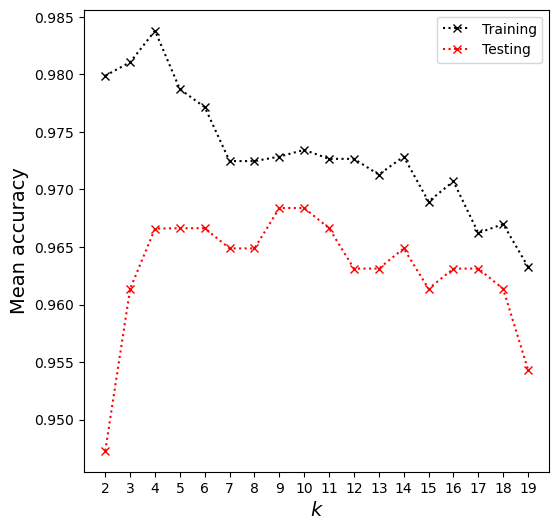

In [51]:
# Plot the score-K curve

plt.figure(figsize=(6,6))
plt.plot(neighbor_range, train, ':xk', label='Training')
plt.plot(neighbor_range, test, ':xr', label='Testing')
plt.ylabel('Mean accuracy', fontsize=14)
plt.xlabel('$k$',fontsize=14)
plt.xticks(neighbor_range)
plt.legend()
plt.show()

In [52]:
# obtain inex of the best K, and use it to get the optimal K
idx = test == np.max(test)
neighbor_range[idx]

array([ 9, 10])

Why two values?

In [53]:
# Choose any of the two
neighbors = 9
knn = KNN(n_neighbors=neighbors)

In [54]:
# Reminder that k is the number of folds
k = 10
tr,te = do_Kfold(knn,X,y,k, SS())

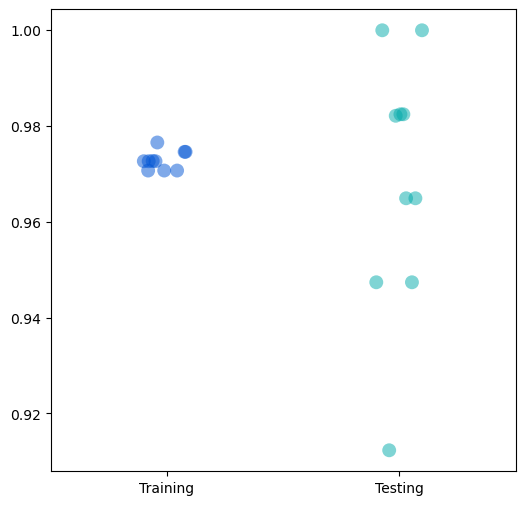

In [19]:
# Visualize train/test scores with scripplot

plt.figure(figsize = (6,6))
sns.stripplot(data = pd.DataFrame(zip(tr,te), columns = ['Training', 'Testing']), size=10, palette = 'winter',
             alpha = 0.5, jitter = True)
plt.show()

## 3. Visualize misclassified points 

Can we visualize which points are being misclassified?

- Look at a single instance of the model
- Choose a method to reduce the dimensionality of the data

In [55]:
# Do a train/test split; take 20% of data as test
Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size=0.2,random_state=146)

In [56]:
# re-scale
ss = SS()
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.transform(Xtest)

In [58]:
# refit the KNN model with the optimal #neighbors; predict y's for test data
knn = KNN(n_neighbors=neighbors)
knn.fit(Xtrain,ytrain)
y_pred = knn.predict(Xtest)

In [59]:
# get the indices of all test rows where prediction does not equal ground truth
idx_wrong = y_pred != ytest
idx_wrong


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False])

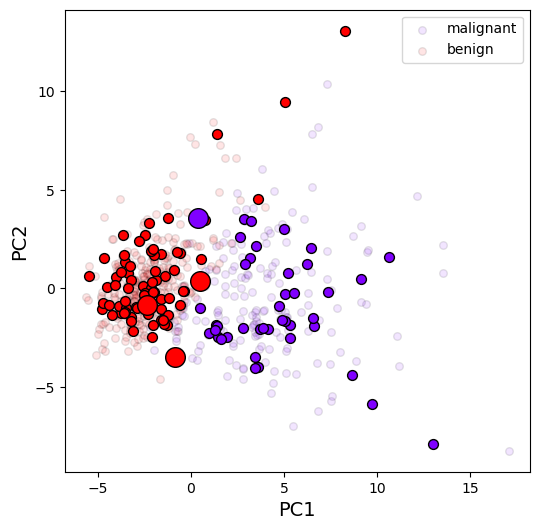

In [60]:
pca = PCA(n_components=2)
Xtrain_pca = pca.fit_transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

# Get a list colors for the labels
colors = get_colors(len(np.unique(y)))

# Show the training data
fig,ax = plot_groups(Xtrain_pca, ytrain, colors, alpha = 0.1)
# Show the testing data
plot_groups(Xtest_pca, y_pred, colors, ax=ax, alpha=1, s=50)
# # Highlight test points that were incorrectly labeled
plot_groups(Xtest_pca[idx_wrong], y_pred[idx_wrong], colors, ax=ax, alpha=1, s=200, legend_text = ['malignant','benign'])
ax.set_xlabel('PC1',fontsize=14)
ax.set_ylabel('PC2',fontsize=14)
#ax.get_legend().remove()
plt.show()


We might also be interested in checking the accuracy in the individual classes, e.g. comparing things like false positives and false negatives. To do this, we can look at a **confusion matrix**.

In [61]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest,y_pred)
cm

array([[41,  3],
       [ 1, 69]])

How do we calculate accuracy using this confusion matrix?

In [62]:
# We could also do it more conveniently
accuracy = knn.score(Xtest, ytest)
accuracy

0.9649122807017544

## 4. Should all votes be counted equally?

In all of the previous examples, we consider each of a data point's $k$ nearest neighbors equally.  However, what if some of those points are farther away than others?  Should they all be considered equal when trying to classify a point?  

One way to modify this algorithm is to give each data point a weight, based on the inverse of its distance to the point we are trying to classify.  For example, if one point was 2 units away, then we would give it a weight of 1/2, and if another point was 100 units away, we would give it a much smaller weight of 1/100.

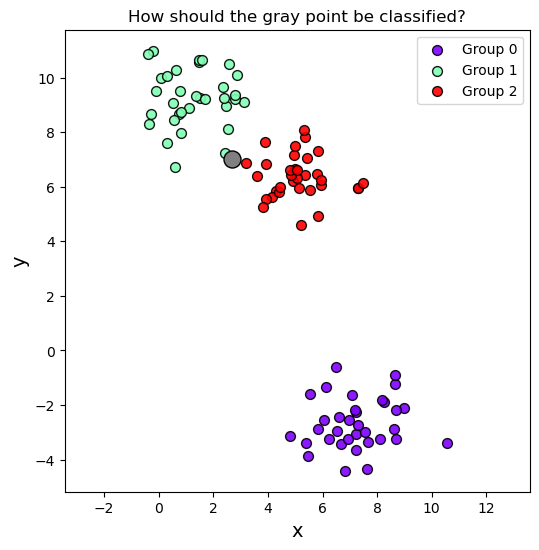

In [63]:
# Get another example of blobs data using the make_blobs function

# How many blobs, total points, and dimensions (features)
n_groups = 3
n_points = 100
n_feats = 2

# a different seed
np.random.seed(32)
data = mb(n_samples = n_points, n_features=n_feats, centers = n_groups)
X = data[0]
y = data[1]

colors = get_colors(n_groups)

# Make a plot of this data, color each group separately
fig, ax = plot_groups(X, y, colors,alpha=0.9,s=50, legend_text = ['Group 0','Group 1', 'Group 2'])

# Create a new data point
random_point = [2.67,7]
# Add this point to the plot
ax.scatter(random_point[0], random_point[1], color='grey', s=150, ec='k')

#plt.legend()
plt.title('How should the gray point be classified?')
plt.axis('equal')
plt.show()

In [64]:
# KNN without weights
knn = KNN(n_neighbors=5)
knn.fit(X,y)
knn.predict(np.array(random_point).reshape(1,-1))

array([2])

In [65]:
knn.predict_proba(np.array(random_point).reshape(1,-1))

array([[0. , 0.4, 0.6]])

In [66]:
# KNN with weights defined on distance
knn = KNN(n_neighbors=5, weights='distance')
knn.fit(X,y)
knn.predict(np.array(random_point).reshape(1,-1))

array([1])

In [67]:
knn.predict_proba(np.array(random_point).reshape(1,-1))

array([[0.        , 0.51046418, 0.48953582]])

In [32]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’
Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.